# Delhi House Price Prediction

## Importing the libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importing the dataset 

In [184]:
df = pd.read_csv('MagicBricks.csv')
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


In [185]:
df.shape

(1259, 11)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [187]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

### Handling the missing values

In [188]:
df['Per_Sqft'] =  df['Per_Sqft'].fillna(df['Price']/df['Area'])
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [189]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [190]:
df[['Bathroom','Parking']] = df[['Bathroom','Parking']].astype('int')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   int32  
 3   Furnishing   1259 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   int32  
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Per_Sqft     1259 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 98.5+ KB


In [192]:

def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'
df['Locality'] = df['Locality'].apply(grp_local)

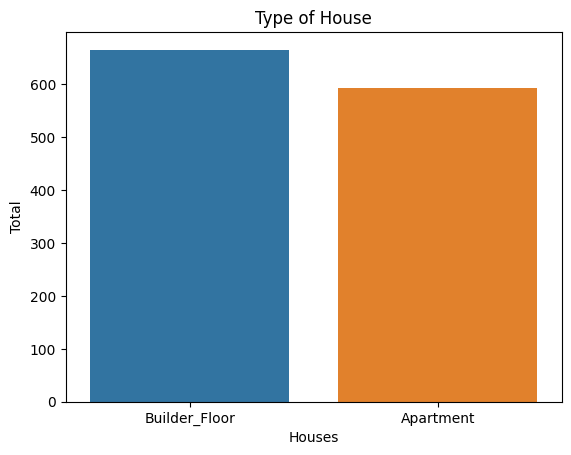

In [193]:
sns.countplot(x='Type',data=df)
plt.xlabel("Houses")
plt.ylabel("Total")
plt.title('Type of House')
plt.show()

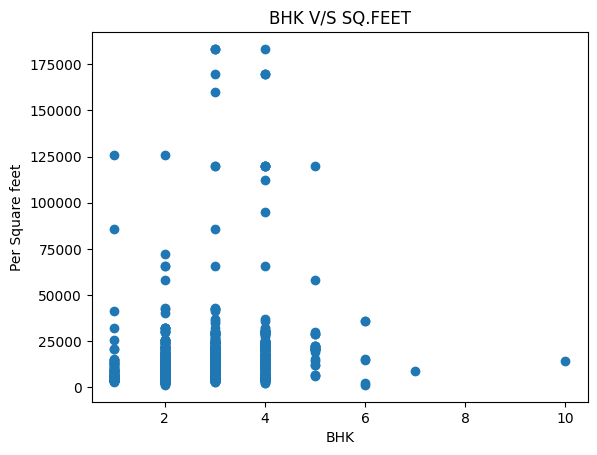

In [194]:
plt.scatter(x=df.BHK,y=df.Per_Sqft)
plt.xlabel("BHK")
plt.ylabel("Per Square feet")
plt.title('BHK V/S SQ.FEET')
plt.show()

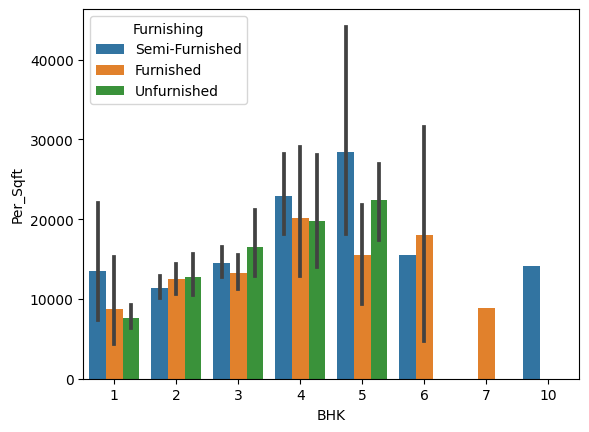

In [195]:
sns.barplot(x=df.BHK,y=df.Per_Sqft,hue=df.Furnishing,)
plt.show()

In [196]:
df[df['Per_Sqft'] == df['Per_Sqft'].max()][['Area','BHK','Price']]

,Area,BHK,Price
104,2700.0,4,55000000
105,1400.0,3,24500000
106,1800.0,3,24500000
107,1400.0,3,32500000


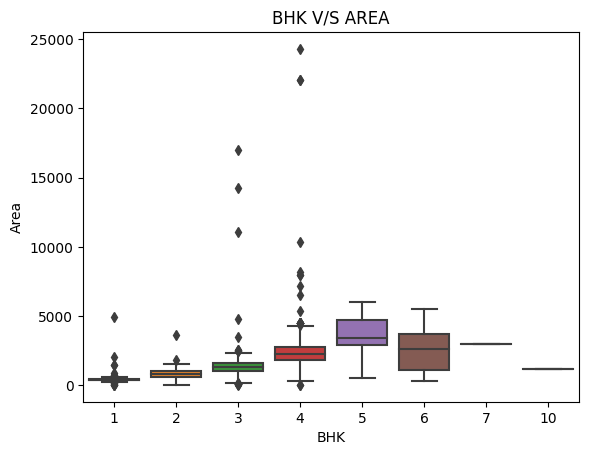

In [197]:
sns.boxplot(x=df.BHK,y=df.Area)
plt.xlabel("BHK")
plt.ylabel("Area")
plt.title('BHK V/S AREA')
plt.show()

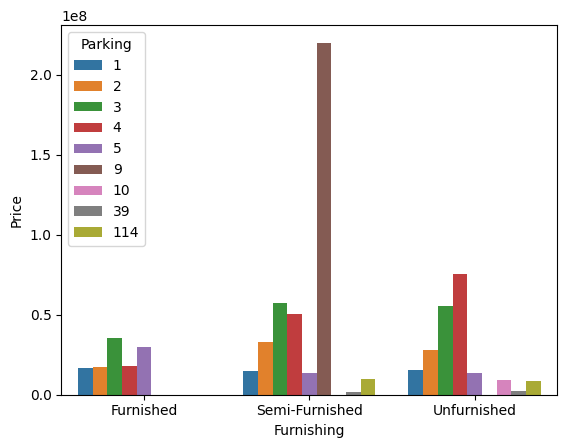

In [198]:
data_agg = df.groupby(['Furnishing', 'Parking'])['Price'].mean().reset_index()
sns.barplot(x='Furnishing', y='Price', hue='Parking', data=data_agg)
plt.show()

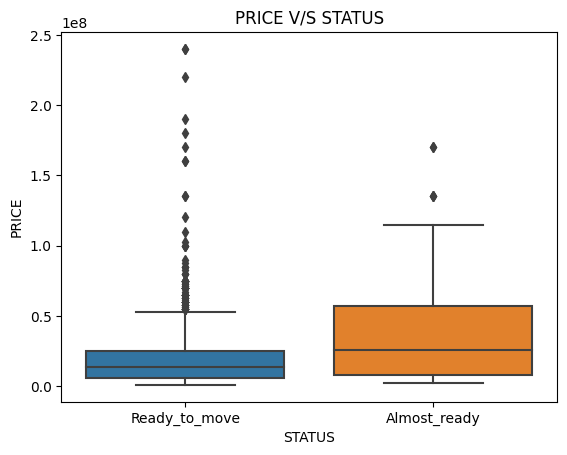

In [199]:
sns.boxplot(x = 'Status', y = 'Price', data = df)
plt.xlabel("STATUS")
plt.ylabel("PRICE")
plt.title('PRICE V/S STATUS')
plt.show()

In [200]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2,Semi-Furnished,Rohini Sector,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,Rohini Sector,1,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2,Furnished,Rohini Sector,1,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2,Semi-Furnished,Rohini Sector,1,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2,Semi-Furnished,Rohini Sector,1,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3,Semi-Furnished,Rohini Sector,1,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
6,1350.0,4,3,Semi-Furnished,Rohini Sector,1,10000000,Ready_to_move,Resale,Builder_Floor,6667.0
7,650.0,2,2,Semi-Furnished,Rohini Sector,1,4000000,Ready_to_move,New_Property,Apartment,6154.0
8,985.0,3,3,Unfurnished,Rohini Sector,1,6800000,Almost_ready,New_Property,Builder_Floor,6154.0
9,1300.0,4,4,Semi-Furnished,Rohini Sector,1,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0


## Features and Target identification

In [201]:
X = df.drop(columns=['Price']).values
y = df['Price'].values

In [202]:
print(X)

[[800.0 3 2 ... 'New_Property' 'Builder_Floor' 8125.0]
 [750.0 2 2 ... 'New_Property' 'Apartment' 6667.0]
 [950.0 2 2 ... 'Resale' 'Apartment' 6667.0]
 ...
 [875.0 3 3 ... 'New_Property' 'Builder_Floor' 12916.0]
 [990.0 2 2 ... 'Resale' 'Builder_Floor' 12916.0]
 [11050.0 3 3 ... 'New_Property' 'Builder_Floor' 12916.0]]


In [203]:
print(y)

[ 6500000  5000000 15500000 ... 17500000 11500000 18500000]


## Encoding the categorical data

In [204]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4,6,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [205]:
print(X)

[[0.0 1.0 0.0 ... 2 1 8125.0]
 [0.0 1.0 0.0 ... 2 1 6667.0]
 [1.0 0.0 0.0 ... 2 1 6667.0]
 ...
 [0.0 1.0 0.0 ... 3 3 12916.0]
 [0.0 0.0 1.0 ... 2 1 12916.0]
 [0.0 0.0 1.0 ... 3 1 12916.0]]


## Splitting the dataset

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [207]:
print(X_train)

[[0.0 0.0 1.0 ... 2 2 22000.0]
 [1.0 0.0 0.0 ... 2 2 11290.322580645161]
 [0.0 1.0 0.0 ... 2 1 30000.0]
 ...
 [0.0 0.0 1.0 ... 2 2 12307.0]
 [0.0 1.0 0.0 ... 3 1 30556.0]
 [0.0 0.0 1.0 ... 2 1 8889.0]]


In [208]:
print(y_train)

[10000000 17500000 24900000 ...  5500000 13000000  8000000]


In [209]:
print(X_test)

[[1.0 0.0 0.0 ... 3 1 7076.923076923077]
 [0.0 1.0 0.0 ... 2 1 9000.0]
 [0.0 1.0 0.0 ... 2 1 9655.0]
 ...
 [0.0 0.0 1.0 ... 2 1 8761.0]
 [0.0 1.0 0.0 ... 3 1 11905.0]
 [0.0 0.0 1.0 ... 1 1 3294.0]]


In [210]:
print(y_test)

[  9200000  13500000   7500000  28500000  10000000  29500000  71000000
  32500000  16500000  43500000   3600000  20000000   8000000  14000000
   3200000  37500000   6000000  29000000  10800000  12000000  20000000
  23500000  37500000  75000000  12500000   6500000  35500000  10800000
  47500000  24500000  30000000  26000000  51000000  17400000  15000000
   7200000   7000000  15600000   2000000  17000000  32500000   1500000
  13000000  16500000   6500000  20500000   6200000  10000000  26000000
  15000000  18000000   3800000   2400000  13000000  45000000  17200000
  35000000   6300000  31500000   2400000  24000000  30000000   4600000
  18500000  16000000  16500000   3200000   7500000  50000000   1900000
  15800000  24900000   5000000  13500000   6800000  19000000  71500000
  15800000   4400000  15600000  20000000   2000000  29000000   5130000
  41000000  26000000  60000000   6540000  35000000   3300000  21000000
   2500000  23000000  17400000  22500000  65000000  15000000   4370000
   500

## Training the model

### Linear Regression

In [211]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# ! 0.6022161571880984

### Decision Tree Regressor

In [212]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# ! 0.7922649081702681

### Random Forest Regressor

In [213]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# ! 0.8628694562071525

### XG Boost Regressor

In [214]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# ! 0.8785660975813221

## R2 Square

In [215]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8785660975813221
